In [1]:
function plot_function(interval,fun)
    a=interval(1);
    b=interval(2);
    x=linspace(a,b,100);
    y1=feval(fun,x);
    hold on;
    plot(x,y1,"linewidth",10);
    plot(x,zeros(length(x)),'b');
    set(gca, "linewidth", 4, "fontsize", 12)
    set(gca, 'XTick', floor(a)-3:floor(b)+3)
endfunction

function draw_vertical_lines(a,b)
    limits = axis ();
    line([a(1),a(1)], [0,a(2)],"linewidth",10, "color", "blue")
    line([b(1),b(1)], [0,b(2)],"linewidth",10, "color", "blue")
endfunction

function plot_sample(a,b,fun,N)
    xi = rand(1,N)*(b-a)+a;
    for i=1:N
        line([xi(i),xi(i)], [0,feval(fun,xi(i))],"linewidth",5, "color", "red")
    end
endfunction

function plot_rectangle(a,b,x,fun)
    rectangle ("Position", [a, 0, abs(b-a), feval(fun,x)], "FaceColor", [0, 0, 1])
endfunction

function [errors,reps]=calculate_error(a,b,fun,max_N,correct_solution)
    reps=1000:50:max_N;
    num_reps=length(reps);
    errors=zeros(1,num_reps);
    results=zeros(1,num_reps);
    pos=1;
    for i=1:num_reps
        xi=rand(1,reps(i))*(b-a)+a;
        f_avg=mean(fun(xi));
        I=(b-a)*f_avg;
        results(pos)=I;
        errors(pos)=abs(I-correct_solution);
        pos=pos+1;
    end
    plot(reps,results,"linewidth",6);
    xlabel('Velicina uzorka');
    ylabel('Rezultat integracije');
    set(gca, "fontsize", 18);
    hold on;
    line([0,max_N], [correct_solution,correct_solution],"linewidth",10, "color", "red")
endfunction

# Monte Karlo integracija

#### Pomoću numeričke integracije možemo da odredimo određeni integral proizvoljne funkcije.
#### Određeni integral predstavlja površinu figure ispod date funkcije na zadatom zatvorenom intervalu.
#### Na primer, na sledećoj slici određeni integral
#### $$\int_{2}^{6}2^xdx$$ je površina figure ispod funkcije $f(x)=2^x$ na zatvorenom intervalu [2,6].

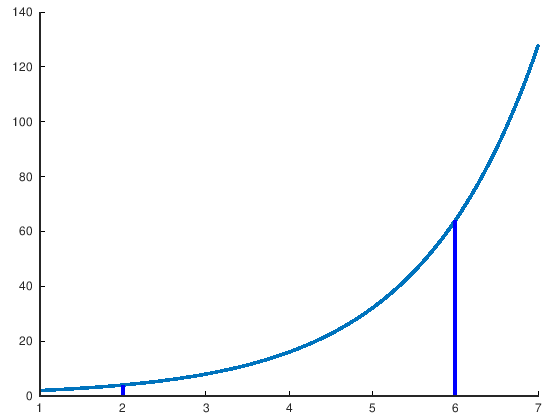

In [7]:
plot_function([1,7],@(x)2.^x)
draw_vertical_lines([2,2^2],[6,2^6])

#### Ranije smo učili Njutn-Kotesove metode koje funkcionišu na sledeći način:
#### Aproksimiramo $f(x)$ fukcjiom $g(x)$, pa integralimo $g(x)$:
#### metoda trapeza - $g(x)$ je prava
#### Smipsonova metoda - $g(x)$ je parabola,....
#### Pored toga učili samo i Rombergovu integraciju, i Gausovu kvadraturu.
#### Ove metode su generalno jednostavne za impelmentaciju i imaju dobru tačnost.
#### Međutim, ne predstavljaju dobro rešenje za višestruke integrale:
#### $$\idotsint_V \mu(u_1,\dots,u_k) \,du_1 \dots du_k$$
#### Vištestruki integrali pojavljuju se recimo u kompujterskoj grafici, najviše kada se određuje osvetljenje u prostoru koji treba da se renderuje. Određivanje centra mase tela potrebno za simulaciju fizike takođe je problem koji formulisan kao višestruki integral.
#### Objasnićemo ukratno šta su višestruki integrali. Nakon toga pokazaćemo zašto su Njutn-Kotesove metode loše za rešavanje ovakvih integrala. Posle toga ćemo pokazati Monte Karlo metodu kao dobru alternativu. 
#### Pre nego što nastavimo, napomenućemo da su sve metode koje smo do sada učili determinstičke, više primena istog algoritma na isti problem uvek daju isti rezultat.

## Višestruki integraili - ukratko

#### Višestruki integral je vrsta određenog integrala na fukcijama koje imaju više promenljivih, na primer $f(x,y)$ ili $f(x,y,z)$.
#### Integrali funkcije sa dve promenljive nad nekim regionom u $R^2$ zovu se dvostruki integrali.
#### Kao što određeni integral pozitivne funkcije jedne promenljive predstavlja površinu ispod podintegralne funkcije na zadatom intervalu na $x$-osi, dvostruki integral pozitivne funkcije predstavlja zapreminu tela između površine definisane funkcijom $z=f(x,y)$ i tela definisanog domenom vrednosti $x$ i $y$ u $x-y$ ravni. Istu zapreminu mogli bi dobiti i pomoću trostrukog integrala konstantne funkcije $f(x,y,z)=1$ nad trodimenzionalnim telom definisanog kao u prethodnoj rečenici.
#### Višestruki integrali za više od 3 promenljive su onda "zapremine" hiper-tela.
#### U nastavku pokazujemo kako izgleda grafik jednog višestrukog integrala in onda rešavamo taj integal pomoću metode trapeza za početak.
#### Prikazujemo i rešavamo sledeći dvostruki integral:
#### $$I=\int_{0}^{\frac{1}{2}} \int_{0}^{\frac{1}{2}} e^{y-x}dydx$$

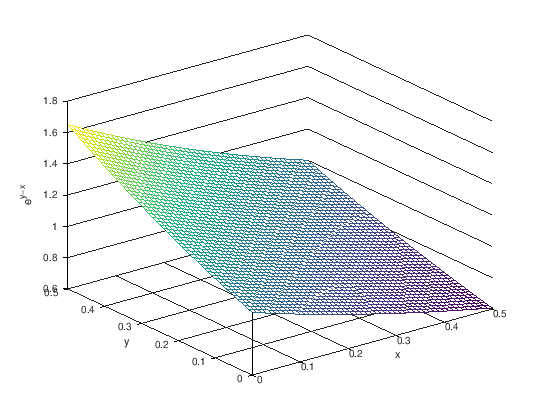

In [8]:
tx = ty = 0:0.01:0.5';
[xx, yy] = meshgrid(tx, ty);
tz = exp(yy-xx);
mesh(tx, ty, tz);
xlabel ("x");
ylabel ("y");
zlabel ("e^{y-x}");

#### Koristimo metodu trapeza da rešimo odredimo vrednost integrala $I$.
#### Koristimo tri tačke za metodu trapeza na intervalu $[a,b]$:
#### $$I=\int_{a}^{b} f(x)dx \approx \frac{h}{2}\left[ f(a) + 2f \left(\frac{a+b}{2}\right) + f(b) \right]\\h=\frac{b-a}{2}$$
#### Ako je $a=0$, $b=\frac{1}{2}$ i $n=2$ onda $h=\frac{(\frac{1}{2}-0)}{2}=\frac{1}{4}$, tako da onda imamo:
#### $$I=\int_{0}^{\frac{1}{2}} f(x)dx \approx \frac{1}{8}\left[ f(0) + 2f \left(\frac{1}{4}\right) + f(\frac{1}{2}) \right]$$
#### Kako bi mogli da primenimo metodu trapeza, konvertovaćemo dvostruki integral u jednostruki na sledeći način. Definišemo funkciju $g(x)$:
#### $$g(x)=\int_{0}^{\frac{1}{2}} e^{y-x}dy$$
#### Onda integrali $I$ definišemo na sledeći način:
#### $$I=\int_{0}^{\frac{1}{2}} g(x)dx$$
#### Primenjujemo sada metodu trapeza:
#### $$I=\int_{0}^{\frac{1}{2}} \int_{0}^{\frac{1}{2}} e^{y-x}dydx=\int_{0}^{\frac{1}{2}} g(x)dx\approx$$
#### $$\approx\frac{1}{8}\left[ g(0) + 2g \left(\frac{1}{4}\right) + g(\frac{1}{2}) \right]$$
#### $$\approx\frac{1}{8}\left[ \int_{0}^{\frac{1}{2}} e^{y-0}dy + 2\int_{0}^{\frac{1}{2}} e^{y-\frac{1}{4}}dy + \int_{0}^{\frac{1}{2}} e^{y-\frac{1}{2}}dy \right]$$
#### Primenjujemo sada metodu trapeza na svaki od 3 integrala u prethodnom redu.
### $$\int_{0}^{\frac{1}{2}} e^{y-0}dy \approx \frac{1}{8}\left[e^{0-0} + 2e^{\frac{1}{4}-0} + e^{\frac{1}{2}-0}\right]$$
### $$\int_{0}^{\frac{1}{2}} e^{y-\frac{1}{4}}dy \approx \frac{1}{8}\left[e^{0-\frac{1}{4}} + 2e^{\frac{1}{4}-\frac{1}{4}} + e^{\frac{1}{2}-\frac{1}{4}}\right]$$
### $$\int_{0}^{\frac{1}{2}} e^{y-\frac{1}{2}}dy \approx \frac{1}{8}\left[e^{0-\frac{1}{2}} + 2e^{\frac{1}{4}-\frac{1}{2}} + e^{\frac{1}{2}-\frac{1}{2}}\right]$$
#### Zamenjujemo prethodna tri integrala sada u postupak ranije:
### $$\approx\frac{1}{8}\left[ \int_{0}^{\frac{1}{2}} e^{y-0}dy + 2\int_{0}^{\frac{1}{2}} e^{y-\frac{1}{4}}dy + \int_{0}^{\frac{1}{2}} e^{y-\frac{1}{2}}dy \right]$$
### $$\approx\frac{1}{8}\left[ \frac{1}{8}\left[e^{0-0} + 2e^{\frac{1}{4}-0} + e^{\frac{1}{2}-0}\right] + 2\frac{1}{8}\left[e^{0-\frac{1}{4}} + 2e^{\frac{1}{4}-\frac{1}{4}} + e^{\frac{1}{2}-\frac{1}{4}}\right] + \frac{1}{8}\left[e^{0-\frac{1}{2}} + 2e^{\frac{1}{4}-\frac{1}{2}} + e^{\frac{1}{2}-\frac{1}{2}}\right] \right]$$
### $$\approx \left[ \frac{1}{64}\left[e^{0} + 2e^{\frac{1}{4}} + e^{\frac{1}{2}}\right] + \frac{1}{32}\left[e^{-\frac{1}{4}} + 2e^{0} + e^{\frac{1}{4}}\right] + \frac{1}{64}\left[e^{-\frac{1}{2}} + 2e^{\frac{1}{2}} + e^{0}\right] \right]$$
### $$\approx 0.25791494889765$$

#### Kod prethodnog primera koristili smo po 3 tačke za metodu trapeza po svakoj dimenziji, što je ukupno 9 tačaka koje su prikazane u nastavku.

In [2]:
sets = {[0 0.25 0.5], [0 0.25 0.5]};
[x y] = ndgrid(sets{:});
cartProd = [x(:) y(:)]

cartProd =

   0.00000   0.00000
   0.25000   0.00000
   0.50000   0.00000
   0.00000   0.25000
   0.25000   0.25000
   0.50000   0.25000
   0.00000   0.50000
   0.25000   0.50000
   0.50000   0.50000



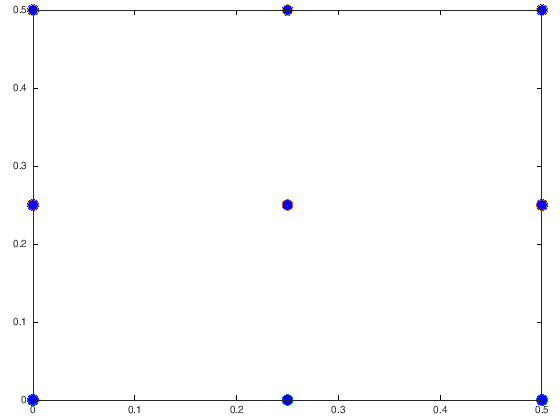

In [3]:
plot(x,y,'o','markersize', 10,'markerfacecolor','b')

#### Međutim, 3 tačke je veoma mali broj, takođe rešavali smo integral male dimenzionalnosti (dvostruki).
#### Sa porastom dimenzija i povećanjem broja tačka metode kao što je trapezna, Simpsonva itd. postaju nepraktične.
#### Na primer za petostruki integral i 10 tačaka po metodi ukupno nam je potrebno $10^5$ tačaka.
#### Iz tog razloga potrebna nam je alternativna metoda koja je robusna na dimezionalnost (višestrukost) integrala.
#### Upravo takva alternativa je Monte Karlo metoda za numeričku integraciju.
#### Pre nego što detaljno objasnimo Monte Karlo integraciju ukratko ćemo prikazati Monte Karlo simulaciju koja čini širu oblast kojoj pripada Monte Karlo integracia.

## Monte Karlo simulacija - ukratko

#### Monte Karlo simulacija oslanja se na ideju upotrebe nasumično generisanih vrednosti za rešavanje problema koji mogu da budu u principu i deterministički. Cilj je da se koristi ogroman broj nasumično izvršenih simulacija (eksperimenata) sa svrhom da će se po zakonu velikih brojeva pojaviti očekivani rezultat problema koji rešavamo. 

#### Monte Karlo princip osmislio je Stanislav Ulam 1940-tih godina dok je radio u Los Alamos National Laboratory na projektu razvoja nuklearne bombe. Njegovu ideju iskoristio je John von Neumann koji je u okviru istog projekta napisao kod za računar ENIAC koji je vršio prve Monte Karlo simulacije.

#### Interesatno je da Stanislav Ulam osmislio MK princip dok se opravljao od bolesti i igrao Canfield solitaire igru sa kartama. Hteo je da proveri kolika je verovatnoća da će promenšan špil od 52 karte moći da se složi uspešno u okviru Canfield solitaire igre. Shvatio je da to nije tako lako rešiv problem koristeći metode iz oblasti kombinatorike. Ono što mu je palo na pamet kao rešenje je da se naparavi jednostavan algoritam za igranje Canfield solitaire igre na računaru i da se onda pokrene da odigra ogroman broj partija, i da se iz rezultata vidi kolika je verovatnoća uspešnog završetka igre. Suština je u tome da algoritam koji igra ne mora da bude jako sofisticiran već brz da bi mogao da se simulira veliki broj partija.

### 'Monty Hall' problem
#### Monte Karlo simulaciju demonstriraćemo na jednom interesantnom problemu oko koga su se vodile mnoge debate. Recimo da ste učesnik u nekom šou na televiziji. Šou je takav da postoje troje vrata. Iza jednih vrata je automobil, a iza preostalih vrata su koze. Učesnik bira vrata koja želi da otvori. Voditelj, koji zna šta je iza svih vrata, otvori neka druga vrata iza kojih je koza i onda pita učesnika da li želi da otvori vrata koja je prvi put birao ili da promeni vrata. Iako deluje kao da je verovatnoća jednaka, učensniku je bolje da promeni vrata.
#### Postoji mnogo rasprava na temu zašto je bolje zameniti vrata. Nećemo ulaziti u detalje. Pokazaćemo jedno tumačenje. Nakon toga ćemo pomoću Monte Karlo metode eksperimentalno potvrditi da je bolje zameniti vrata.
#### Jedno od tumačenja: Na početku učesnik ima verovatnoću $\frac{1}{3}$ da odabere vrata iza kojih je auto (pogledati slike ispod). Recimo da je odabrao prva vrata. Verovatnoća da je auto iza vrata 2 ili 3 je $\frac{2}{3}$. Recimo da voditelj otvori vrata 3 i da je iza njih koza. Tada vrata 2 imaju verovatnoću $\frac{2}{3}$ da je iza njih auto (pogledati slike ispod), pa je tada učesniku bolje da zameni vrata.
#### Mi ćemo u kodu simulirati veliki broj partija ove igre i iz ishoda proveriti da li je učesniku bilo bolje da zameni vrata ili ostane pri prvom izboru. Simulaciju smo realizovali tako da ako prvo nasumično rasporedimo auto i koze. Onda učesnik bira vrata. Ako je iza vrata koje je odabrao bio auto onda povećavamo broj ishoda kod kojih je bilo bolje da ostane pri prvom izboru, a u suprotnom povećavamo broj ishoda kod kojih je bilo bolje da zameni vrata.

# <center><img src="Monty_Hall_1.png" width="600" height="600"></center>

# <center><img src="Monty_Hall_2.png" width="600" height="600"></center>

In [32]:
function [stick_wins, switch_wins, stick_wins_prob, switch_wins_prob] = mote_carlo_sim(n_sims)
    doors = [1 2 2]; %1=car, 2=goat
    stick_wins = 0;
    switch_wins = 0;
    stick_wins_prob = zeros(1,n_sims);
    switch_wins_prob= zeros(1,n_sims);
    for i=1:n_sims
        rand_dors = randperm(numel(doors));
        choice = randi(3);
        if (doors(choice) == 1)
            stick_wins = stick_wins + 1;
        else
            switch_wins = switch_wins + 1;
        end
        stick_wins_prob(i)=stick_wins/(i+1);
        switch_wins_prob(i)=switch_wins/(i+1);
    end
endfunction

In [33]:
n_sims=10000;
[stick_wins, switch_wins, stick_wins_prob, switch_wins_prob] = mote_carlo_sim(n_sims);
stick_wins
switch_wins

stick_wins =  3355
switch_wins =  6645


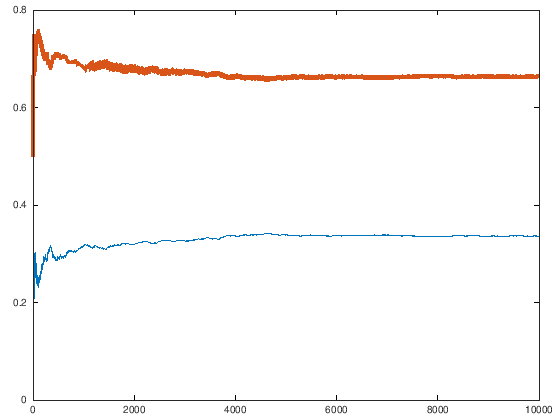

In [34]:
plot(1:n_sims, stick_wins_prob, switch_wins_prob,"linewidth",10)

#### Iz rezultata i sa grafika možemo videti da nakon 10,000 simulacija imamo skoro duplo veći broj slučajeva da je učesnik osvojio auto kada je zamenio vrata. Na taj način smo dobili i emprijsku potvrdu naše pretpostavke.

## Monte Karlo integracija

#### Vraćamo se na današnju temu. Pokazaćemo na koji način koristimo Monte Karlo simulaciju da bi dobili vrednost određenog integrala.
#### Koristimo Teoremu Srednje Vrednosti koja oblika:
### $$f_{avg}=\frac{1}{b-a}\int_{a}^{b} f(x)dx$$
#### gde je $f_{avg}$ prosečna vrednost funkcije na intervalu $[a,b]$.
#### Iz Teoreme Srednje Vrednosti sledi:
### $$\int_{a}^{b} f(x)dx=(b-a)f_{avg}$$
#### Iz prethodne formule vidi se da ćemo određeni integrali funkcije na intervalu $[a,b]$ izračunavati pomoću proseka funkcije $f_{avg}$ na tom intervalu. Postavlja se pitanja na koji način ćemo izračunati prosek?
#### Za izračunavanje proseka koristimo Monte Karlo princip, odnosno prosek procenjujemo pomoću uzorka (sempla) tačaka na intervalu $[a,b]$.
#### Sada možemo da kažemo da je Monte Karlo integracija stohastička metoda jer će rezultat, tj. prosek zavisiti od uzorka tačaka, a uzorak tačaka može biti svaki put drugačiji.
#### Naravno, što je uzorak veći to je procena stvarne vrednosti proseka bolja.
### Formula za naivnu Monte Karlo metodu
#### U nastavku je data formula za naivnu Monte Karlo integraciju. Nakon naivne metode, predložene su mnoge varijante koje se uglavnom narzlikuju po načinu na koji se uzrokuju tačke na osnovu kojih se procenjuje prosek.
#### Integral funkcije $f(x)$ na intervalu $[a,b]$ pomoću Monte Karlo integracije određujemo na sledeći način:
### $$\int_{a}^{b} f(x)dx=(b-a)f_{avg}$$
### $$f_{avg}\approx \frac{1}{N}\sum_{i=1}^{N} f(x_i)$$
#### Tačke $x_i$, $i=1,2,\dots ,N$ su nasumično odbrane tačke iz unifromne distribucije na $[a,b]$, a $N$ je veličina uzorka.
#### Pokazaćemo sada na primeru kako izgleda Monte Karlo integracija funkcije jedne promenljive. Primer koji koristimo je:
#### $$I=\int_{2}^{6}2^xdx$$
#### Za početak pokazujemo kako izgleda jedan uzorak tačaka na intervalu $[2,6]$.

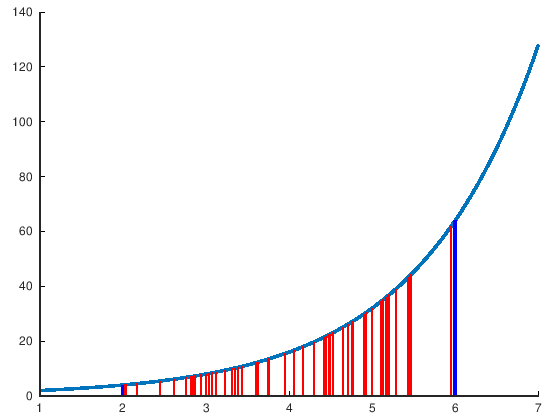

In [36]:
a=2;b=6;
N=50;
plot_function([1,7],@(x)2.^x)
draw_vertical_lines([2,2^2],[6,2^6])
hold on;
plot_sample(a,b,@(x)2.^x,N)

#### Na grafiku iznad prikazane su vrednosti funkcije $f(x)=2^x$ u $N$ tačaka koje su uzorkovane iz uniformne distribucije na intervalu $[2,6]$.
#### Vrednosti određenog integrala predstavlja prosek tih $N$ vrednosti funkcije $f(x)=2^x$ pomnožen sa dužinom itervala, tj. $(6-2)$.
#### Ako je $x_i$ uzorkovana tačka na intervalu $[a,b]$, onda je vrednost $f(x_i)(b-a)$ površina pravougaonika koji ima dužine stranica  $(b-a)$ i  $f(x_i)$. U nastavku pokazujemo 5 takvih pravougaonika za funkciju $f(x)=2^x$ na intervalu $[2,6]$.

In [37]:
a=2;b=6;
N=10;
xi = rand(1,N)*(b-a)+a

xi =

 Columns 1 through 8:

   2.4698   3.9137   2.7131   5.0207   4.0412   4.5874   5.0991   4.0277

 Columns 9 and 10:

   4.8420   5.2121



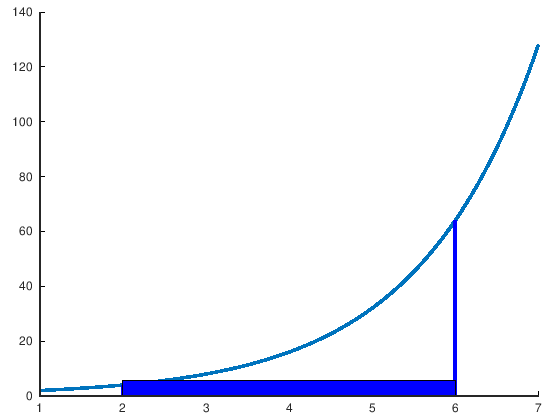

In [38]:
plot_function([1,7],@(x)2.^x)
draw_vertical_lines([2,2^2],[6,2^6])
hold on;
plot_rectangle(2,6,xi(1),@(x)2.^x)
hold off;

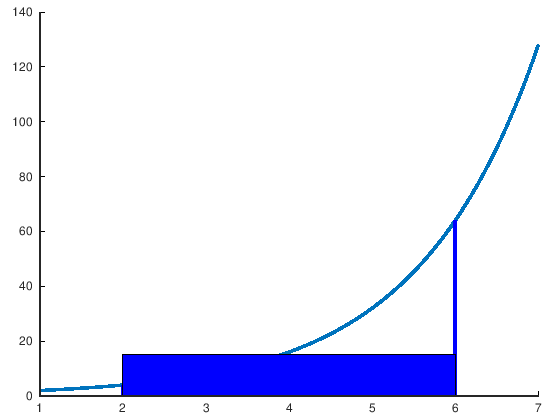

In [39]:
plot_function([1,7],@(x)2.^x)
draw_vertical_lines([2,2^2],[6,2^6])
hold on;
plot_rectangle(2,6,xi(2),@(x)2.^x)

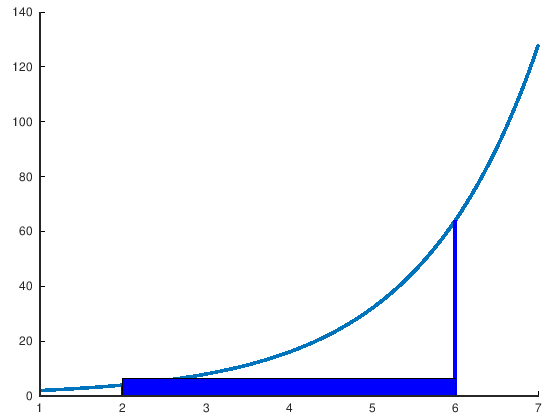

In [40]:
plot_function([1,7],@(x)2.^x)
draw_vertical_lines([2,2^2],[6,2^6])
hold on;
plot_rectangle(2,6,xi(3),@(x)2.^x)

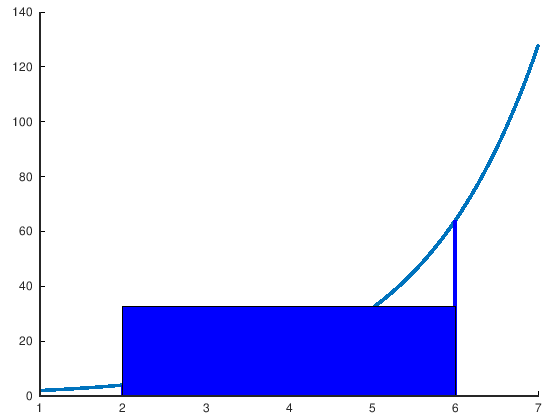

In [41]:
plot_function([1,7],@(x)2.^x)
draw_vertical_lines([2,2^2],[6,2^6])
hold on;
plot_rectangle(2,6,xi(4),@(x)2.^x)

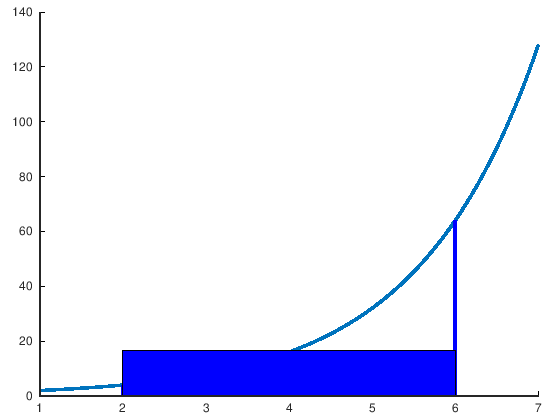

In [42]:
plot_function([1,7],@(x)2.^x)
draw_vertical_lines([2,2^2],[6,2^6])
hold on;
plot_rectangle(2,6,xi(5),@(x)2.^x)

#### Procena povrišine ispod podintegralne funkcije u ovom slučaju bio bih prosek površina prikazanih 5 pravougaonika. Očigledno je da je 5 mali broj za dobru procenu, ali ako bi uzeli npr. 10,000 takvih pravougaonika dobili di prilično dobru procenu vrednosti određenog integrala.
#### Izračunaćemo sada vrednosti integrala 
#### $$I=\int_{2}^{6}2^xdx$$
#### pomoću 10,000 tačaka uzorkovanih iz uniformne distribucije na $[2,6]$. Vrednost integrala pomoću Monte Karlo metode je:
### $$\int_{2}^{6} 2^xdx=(6-2)f_{avg}$$
### $$f_{avg}\approx \frac{1}{10,000}\sum_{i=1}^{10,000} 2^{x_i}$$
#### Vrednost integrala računamo pomoću Octave.

In [55]:
fun=@(x)2.^x;
a=2;b=6;
N=30000;
xi=rand(1,N)*(b-a)+a;
f_avg=mean(fun(xi))
I=(b-a)*f_avg

f_avg =  21.661
I =  86.644


In [56]:
tacno_resenje = 86.56170

tacno_resenje =  86.562


In [57]:
procentualna_greska = abs(I-tacno_resenje)/tacno_resenje*100

procentualna_greska =  0.095072


#### Ako više puta pokrenemo kod za izračunavanje integrala, možemo da primetimo da se rezultat menja jer je metoda stohastička. Takođe se menja i greška koja je za ovaj primer pomoću 10,000 tačaka greška dosta mala (obično ispod 1%). 
#### Rešićemo sada i primer dostrukog integrala koji smo rešavali na početku predavanja:
#### $$I=\int_{0}^{\frac{1}{2}} \int_{0}^{\frac{1}{2}} e^{y-x}dydx$$

In [64]:
fun=@(x,y)exp(y-x);
a=0;b=0.5;
c=0;d=0.5;
N=10000;
xi=rand(1,N)*(b-a)+a;
yi=rand(1,N)*(d-c)+c;
f_avg=mean(fun(xi,yi))
p_pravougaonik=(b-a)*(d-c);
I=p_pravougaonik*f_avg

f_avg =  1.0203
I =  0.25508


In [65]:
tacno_resenje = 0.25525;

In [66]:
procentualna_greska = abs(I-tacno_resenje)/tacno_resenje*100

procentualna_greska =  0.065302


### Dokaz da Monte Karlo integracija radi
#### Jedna vrednost $f(x_i)$ je jedan uzorak uzorkovan iz distribucije vrednosti funkcije $f(x)$ na nekom intervalu. Ako ta distribucija vrednosti funkcije $f(x)$ na nekom intervalu ima konačnu srednju vrednost $f_{avg}$ i varijansu $\sigma^2$ onda važi sledeće.
#### Ako uzmemo $N$ uzoraka $f(x_i)$ iz distribucije vrednosti funkcije i pomoću njih izračunamo prosek funkcije:
### $$f_{avg_N}=\frac{1}{N}\sum_{i=1}^{N} f(x_i)$$
#### onda na osnovu Zakona velikih brojeva važi:
### $$\lim_{N\to\infty} f_{avg_N} = f_{avg}$$
#### kako povećavamo veličinu uzorka približavamo se tačnoj vednosti proseka funkcije $f_{avg}$ na nekom intervalu. Time imamo dokaz da Monte Karlo integracija funkcioniše.
### Greška Monte Karlo integracije
#### Cilj nam je da vidimo koliko tipično naša procena proseka funkcije pomoću uzorka $f_{avg_N}$ odstupa od stvarne vrednosti proseka funkcije $f_{avg}$. To možemo da uradimo pomoću standardne devijacije. Dakle, hoćemo da vidimo koja je standardna devijacija naših procena proseka pomoću uzorka (označićemo je sa $\sigma_{f_{avg_N}}$) od stvarne vrednosti proseka funkcije. Takođe hoćemo da vidimo u kom je odnosu ta standardna devijacija sa veličinom uzroka $N$.
#### Odogovor na prethodna dva pitanja daje nam Centralna granična teorema koja ima sledeće intuitivno tumačenje (formalna definicija i dokaz su van opsega ovog predmeta i pripadaju oblasti verovatnoće i statistike):
#### Recimo da imamo neku distribuciju koja ima konačnu srednju vrednost $\mu$ i standardnu devijaciju $\sigma$ koje nam nisu poznate. 
#### Ako koristimo uzorke da procenimo $\mu$ i $\sigma$ onda će rezultati tih procena biti normalno distribuirani (bez obzira iz kakve distribucije uzorkujemo). 
#### Srednja vrednost te normalne distribucije je baš srednja vrednost distribucije iz koje uzorkujemo $\mu$, a standardna devijacija zavisi od veličine uzorka $N$. 
#### Što više tačaka uzorkujemo standardna devijacija je manja (normalna distribucija je "uža"). 
#### Konkretno vrednost standardne devijacije procena $\sigma_{P}$ je:
#### $$\sigma_{P}=\frac{\sigma}{\sqrt N}$$

# <center><img src="CLT.png" width="600" height="600"></center>

#### Šta možemo da zaključimo iz Centralne granične teoreme vezano za Monte Karlo integraciju:
#### 1. Naše procene proseka pomoću uzorka su normalno distribuirane oko od stvarne vrednosti proseka funkcije.
#### 2. Standardna devijacija procena proseka funkcije pomoću uzorka (označićemo je sa $\sigma_{f_{avg_N}}$) oko stvarne vrednosti proseka funkcije $f_{avg}$ ima vrednost:
#### $$\sigma_{f_{avg_N}}=\frac{\sigma}{\sqrt N}$$
#### Dakle, tačka 1. nam kaže da ćemo uvek odbiti normalnu distribuciju procena srednje vrednosti, a tačka 2. da će se normalna distribucija sužavati oko stvarne srednje vrednosti kako povećavamo veličinu uzorka.
#### Šta još možemo da zaključimo iz 1. i 2.? 
#### Prvo, poznato je (a to ćete detaljnije učiti na drugim predmetima) da se većina tačaka normalne distribucije nalazi untar 2 standardne devijacije oko srednje vrednosti, pa onda na osnovu 1. i 2. možemo da zaključimo da će rezultat Monte Karlo metode biti negde u sledećim granicma:
#### $$I=\int_{a}^{b} f(x)dx=(b-a)\cdot f_{avg}\cdot \pm 2 \frac{\sigma}{\sqrt N}$$
#### gde je $\sigma$ standardna devijacija funkcije $f(x)$ na intervalu $[a,b]$.
#### Drugo, ako povećavamo $N$ standardna devijacija naših procena proseka prbližavaće se stvarnom proseku proprocionalno sa $\frac{1}{\sqrt N}$ što znači da je red greške Monte Karlo integracije:
#### $$O\left(\frac{1}{\sqrt N}\right)$$
#### Ako broj tačaka povećmo 4 puta imamo sledeće:
#### $$O\left(\frac{1}{\sqrt {4N}}\right)=\frac{1}{\sqrt 4}O\left(\frac{1}{\sqrt N}\right)=\frac{1}{2}O\left(\frac{1}{\sqrt N}\right)$$
#### Znači, ako hoćemo da grešku smanjimo 2 puta, moramo 4 puta da povećamo broj tačaka.
#### Šta možemo da zaključimo iz reda greške Monte Karlo metode?
#### Podsetimo se reda grešaka Njutn-Kotesovih metoda:
#### Ako uzmemo da je $h=\frac{b-a}{N}$ greška metoda trapeza je:
#### $$O\left(h^2\right)=O\left(\frac{1}{N^2}\right)$$
#### Ako broj tačaka povećmo 4 puta imamo sledeće:
#### $$O\left(\frac{1}{(4N)^2}\right)=\frac{1}{16}O\left(\frac{1}{N^2}\right)$$
#### Očigledno je da već metoda trapeza ima mnogo bolji red greške od Monte Karlo metode. Postavlja se pitanje zašto bi koristili Monte Karlo metodu?
#### Zato što veličina uzorka $N$ i samim tim i red greške ne zavise od dimezionalnost, tj. od višestrukosti integala.
#### Ako kod metode trapeza dupliramo broj tačaka, to dupliranje je po dimenziji. Na primer, ako imamo dvostruki integral i umesto 3 tačke po dimenziji uzmemo 6 tačaka onda sa ukupno 9 2d tačka prelazimo na 36 2d tačaka. 
#### Dakle, broj tačaka koji nam treba da smanjimo grešku kod Njutn-kotesovih metode zavisi od višestrukosti integrala. To nije slučaj kod Monte Karlo metode. Bez obzira da li radimo u 1d, 2d ili n-d ako broj tačaka povećamo 4 puta greška će se uvek prepoloviti.
#### Pokazаćemo sada na primeru sledećeg integala kako izgleda greška Monte Karlo metode:
#### $$I=\int_{2}^{6}2^xdx$$
#### Na slici ispod, crvenom linijom označeno je tačno rešenje, dok su plavim linijama označeni rezultati Monte Karlo integracije.
#### Vidimo da se sa povećanjem veličine uzroka rezultati sve manje variraju oko tačnog rešenja.

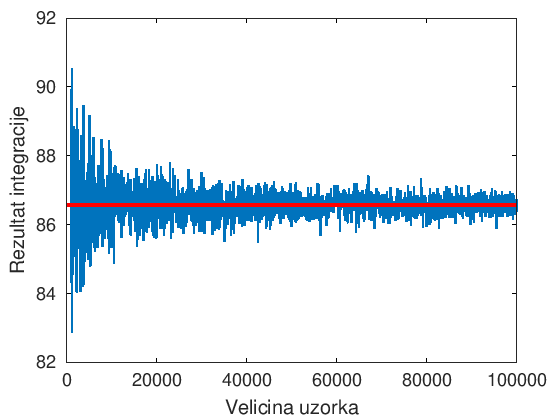

In [67]:
fun=@(x)2.^x;
a=2;b=6;
max_N=100000;
correct_solution=86.56170;
[errors,reps]=calculate_error(a,b,fun,max_N,correct_solution);

#### Na slici ispod, crvenom linijom označeno je funkcija $f(N)=\frac{1}{\sqrt{N}}$ gde je $N$ velčina uzroka, dok su plavim linijama označene greške Monte Karlo integracije.
#### Vidimo da funkcije imaju vrlo sličan oblik, odnosno da smo na ovom primeru potvrdili red greške Monte Karlo integracije.

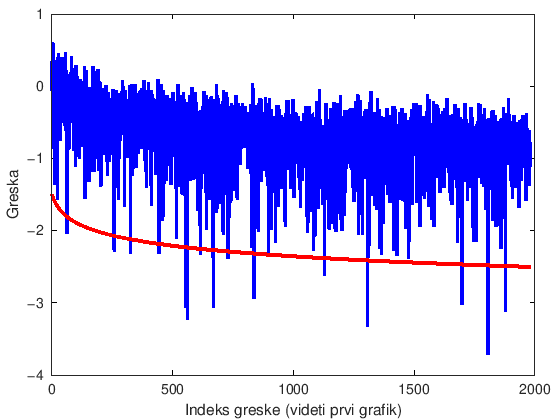

In [68]:
plot(1:length(errors),log10(errors),"linewidth",10,"color","blue")
hold on;
plot(1:length(reps),log10(sqrt(1./reps)),"linewidth",10,"color", "red")
xlabel('Indeks greske (videti prvi grafik)');
ylabel('Greska');
set(gca, "fontsize", 14)

### Formula za naivnu Monte Karlo itegraciju - upoštenje na više od jedne dimenzije

#### U ovom slučaju integraciju vršimo u $n$-dimenzionom prostoru, a sa $\overrightarrow{x}$ označavamo tačku u  $n$-dimenzionom prostoru.
#### integral funkcije $f(\overrightarrow{x})$ na nekom domenu $D$ u $n$-dimezionom prostoru određujemo na sledeći način:
#### $$\int_{D}f(\overrightarrow{x})d\overrightarrow{x}=\int_{D}d\overrightarrow{x}f_{avg}$$
#### $$f_{avg}\approx \frac{1}{N}\sum_{i=1}^{N} f(\overrightarrow{x}_i)$$
#### Sada smo veličinu intervala $[a,b]$ koja je bila $(b-a)$ zamenili sa "zapreminom" $n$-dimenzionog domena $D$:
#### $$\int_{D}d\overrightarrow{x}$$
#### "Zapreminu" $n$-dimenzionog domena $D$ nije lako odrediti ako je domen $D$ kompleksan. Upravo iz tog razolga, Monte Karlo integracija nije samo dobra alternativa kada imamo integrale visoke dimezionalnosti, već i kada integralimo na kompleksim domenima. Renderovanje osvetljenja i određivanje centra mase proizvoljnog tela su baš takvi primeri.
#### U nastavku pokazujemo na koji način određujemo "Zapreminu" $n$-dimenzionog domena $D$ pomoću Monte Karlo metoda.
### Metod pogodaka i promašaja (*hit and miss method*)
#### Ideja je da ako imamo komplikovani domen $D$, pronađemo jednostavniji domen $A$ koji sadrži $D$.
#### Domen $A$ mora da bude takav da se njegova površina može jednostavno odrediti.
#### Uzorkujemo $N$ tačaka iz domena $A$.
#### Brojimo koliko od tih tačaka je u $D$ i tu vrednost označimo sa $N_D$.
#### Površina domena $D$ je onda:
#### $$P_D=\frac{N_D}{N}P_A$$
#### gde je $P_A$ površina domena $A$.
#### Metod pogodaka i promašaja ilustrovaćemo na određivanju vrednosti broja $\pi$.
#### Kao domen $A$ uzimamo jedinični kvadrat (označen crveno na slici dole), a kao domen $D$ jedinični krug (označen plavo na slici dole).
#### Generišemo $N=10,000$ tačaka iz jediničnog kvadrata i provervamo koji deo je u jediničnom krugu.
#### Lako je videti da kada znamo povšinu jediničnog kruga $P_D$ da je onda:
#### $$\pi=4P_D$$
#### U nastavku je dat Ocatave kod.

3.14159265


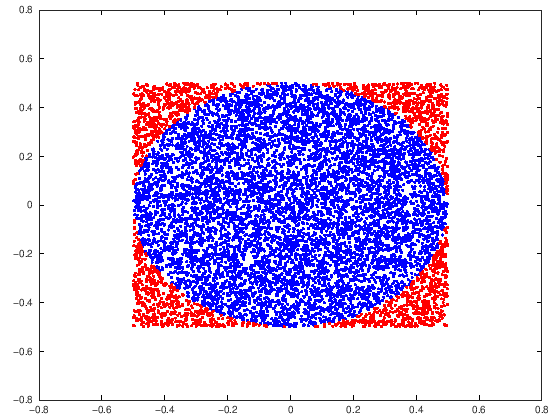

In [73]:
nmax = 10000; %velicina uzorka
x = rand(nmax,1); %uzokovanje u izmedju 0 i 1
y = rand(nmax,1);
x1=x-0.5; %pomocu uzorka iz 0 i 1 dobijamo uzorak koji je u jedinicnom kvadratu
y1=y-0.5;
r = sqrt(x1.^2+y1.^2) ; % ubacjemo uzorak (2d tacku) u jedancinu kruga da dobijemo r
inside=r<=0.5; % tesitramo koji uzorci su u krugu
outside=r>0.5; % a koji nisu
plot(x1(inside),y1(inside),'b.');
hold on
plot(x1(outside),y1(outside),'r.');
thepi = 4*sum(inside)/nmax; %odredjujemo pi
fprintf('%8.8f\n',pi)